# CONSOLIDATE DatePrep

In [ ]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


In [ ]:

class Data(object):
    pass

df = Data
summ = Data


In [ ]:
import helpdesk as hd

In [ ]:

import pandas as pd, numpy as np
from datetime import datetime


In [ ]:

DEBUG = True
seed = 1919


In [ ]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [8]:
# Import the Base Dataset
base_dataset_name = 'dataset_base_2022-11-19.csv'

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())


(541552, 21)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos']


In [9]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  position  x_num_dogs  Winner_actual  Top3_actual  position_random  Winner_random  Top3_random  \
0        0        0          0       0         0         0          0      0         0      0         0           0              0            0                0              0            0   

   position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  
0                   0                0              0      0  


In [10]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2022-11-24.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())


(541552, 19)

['@id_DOG', '@id_RACE', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']


In [11]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  \
0        0         0            0          0           0            0           0           0           0             0           0                0             0            0            0   

   x_speed_max  x_speed_range  x_speed_std  x_no_prev_r_in_dist  
0            0              0            0                    0  


In [12]:

# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-10-29.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())


(541552, 16)

['@id_DOG', '@id_RACE', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1']


In [13]:

# Import the Race Profile
dateprep_categorical = 'dataprep_categorical_2022-11-25.csv'

df_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')

print(df_categorical.shape)
print()
print(df_categorical.columns.values.tolist())


(541552, 13)

['@id_DOG', 'DogName', '@id_RACE', 'RaceName', 'Distance', 'x_dist_gp', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700']


In [26]:

# Merge the datasets together
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)

print()
print()

df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())

print()
print()
df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print()
df_base = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base.shape)
print(df_base.columns.values.tolist())


(541552, 21)
(541552, 19)
(541552, 16)


(541552, 38)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']


(541552, 52)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_r

### Normalising the x_speed_prev in Each RaceId

In [15]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2022-11-24 08:30:41.848751


In [27]:

# QC the Transformation

print(pd.DataFrame(df_base.isna().sum()).transpose())

#df_base2.groupby('x_no_prev_races')['x_speed_prev_std'].isna().sum()
#df_base2.groupby('x_no_prev_races')[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.isna().sum())
#df_base1.groupby(['x_no_prev_races','x_no_speed_prev_std'])[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.eq(0).sum())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  position  x_num_dogs  Winner_actual  Top3_actual  position_random  Winner_random  Top3_random  \
0        0        0          0       0         0         0          0      0         0      0         0           0              0            0                0              0            0   

   position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  ...  x_speed_range  x_speed_std  x_no_prev_r_in_dist  G5  G4  G3  G2  G1  Gmix  Gmas  \
0                   0                0              0      0            0          0           0            0  ...              0            0                    0   0   0   0   0   0     0     0   

   Gmai  Gh  Gres  Gnov  Gsp  Gfin  RaceGrade_H1  RaceName  dist300  dist350  dist400  dist450  dist500  dist600  dist700  
0     0   0     0     0    0     0             0        15        0        0        0       

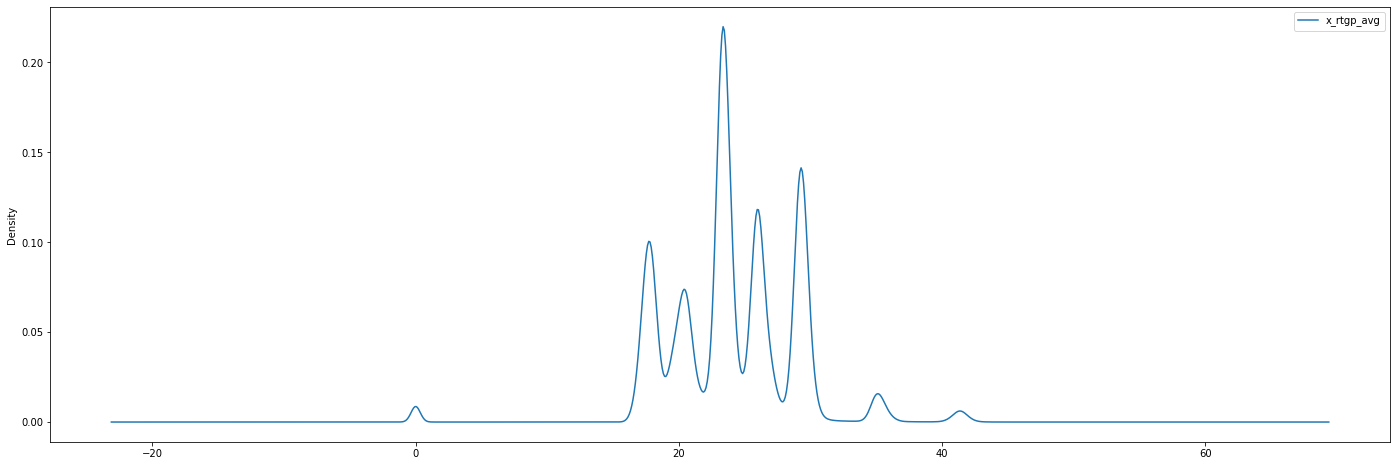

In [28]:

#df_base1['x_rtgp_prev'].plot( kind='density', legend=True, figsize = (24,8) )
df_base['x_rtgp_avg'].plot( kind='density', legend=True, figsize = (24,8) )


In [29]:

# Normalising multiple columns in loop

print(datetime.now())

cols_to_norm = ['x_races_tot' \
                , 'x_speed_prev' ,'x_speed_avg' ,'x_speed_min' ,'x_speed_max' ,'x_speed_range'\
                , 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range']

for curr_col in cols_to_norm:
    
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    no_std_name = curr_col + '_std' + '_no'
    norm_name = curr_col + '_norm'
    
    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm , on = '@id_RACE')
    df_base[no_std_name] = df_base[std_name].apply(lambda x : 1 if x == 0 else 0)

    #df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]
    #df_base['x_speed_prev_norm'] = df_base.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1)
    df_base[norm_name] = df_base.apply(lambda x : 0.5 if (x[mean_name] == 0) | (x[std_name] == 0) | (pd.isna(x[std_name])) else ( x[curr_col] - x[mean_name] ) / x[std_name], axis = 1)
    #df_base[norm_name] = df_base[norm_name].fillna(0.5)
    
    df_base.drop(columns = [mean_name, std_name, no_std_name], inplace = True)

print(datetime.now())


2022-11-25 05:52:53.043803
x_races_tot_mean x_races_tot_std x_races_tot_norm
x_speed_prev_mean x_speed_prev_std x_speed_prev_norm
x_speed_avg_mean x_speed_avg_std x_speed_avg_norm
x_speed_min_mean x_speed_min_std x_speed_min_norm
x_speed_max_mean x_speed_max_std x_speed_max_norm
x_speed_range_mean x_speed_range_std x_speed_range_norm
x_rtgp_prev_mean x_rtgp_prev_std x_rtgp_prev_norm
x_rtgp_avg_mean x_rtgp_avg_std x_rtgp_avg_norm
x_rtgp_min_mean x_rtgp_min_std x_rtgp_min_norm
x_rtgp_max_mean x_rtgp_max_std x_rtgp_max_norm
x_rtgp_range_mean x_rtgp_range_std x_rtgp_range_norm
2022-11-25 05:55:11.784888


In [30]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'x_races_tot_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rtgp_prev_norm', 'x_rtgp_avg_norm', 'x_rtgp_min_norm', 'x_rtgp_max_norm', 'x_rtgp_range_norm']


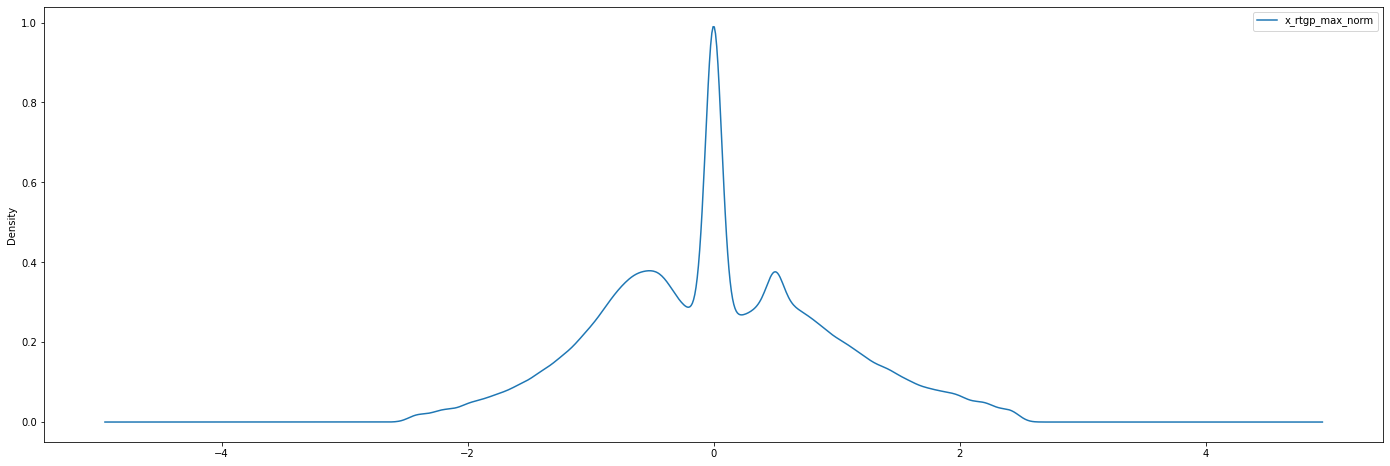

In [31]:

#df_base['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg_norm'].plot( kind='density', legend=True, figsize = (24,8) )
df_base['x_rtgp_max_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [32]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'modeling_base_{todaydt}.csv'

exp_ds = df_base.drop(columns = cols_for_drop)


In [33]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'x_races_tot_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rtgp_prev_norm', 'x_rtgp_avg_norm', 'x_rtgp_min_norm', 'x_rtgp_max_norm', 'x_rtgp_range_norm']


In [34]:

exp_ds.tail()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,...,Gh,Gres,Gnov,Gsp,Gfin,RaceGrade_H1,RaceName,dist300,dist350,dist400,dist450,dist500,dist600,dist700,x_races_tot_norm,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm
541547,1478450099,BAD BOY DELLY,16.39,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,34.00,4,6,0,0,1.0,1,1,4.0,0,0,4,0,300,18.077206,0.0,...,0,0,0,0,0,Other,AWESOME PROJECT 5 & UP,1,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
541548,1701190008,SWIZZ ROLL CLOUD,15.87,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,3.80,1,6,1,1,2.0,0,1,2.0,0,1,1,0,300,17.503676,0.0,...,0,0,0,0,0,Other,AWESOME PROJECT 5 & UP,1,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
541549,1907950051,ALDERLEY ROX,16.84,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,101.00,6,6,0,0,6.0,0,0,6.0,0,0,6,0,300,18.573529,0.0,...,0,0,0,0,0,Other,AWESOME PROJECT 5 & UP,1,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
541550,2035650008,ALPINE LITTLE,15.95,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,1.55,2,6,0,1,3.0,0,1,1.0,1,1,2,0,300,17.591912,0.0,...,0,0,0,0,0,Other,AWESOME PROJECT 5 & UP,1,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
541551,2116930017,MY RAINMAKER,16.57,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,81.00,5,6,0,0,5.0,0,0,5.0,0,0,5,0,300,18.275735,0.0,...,0,0,0,0,0,Other,AWESOME PROJECT 5 & UP,1,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:

exp_ds.describe()


In [35]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)

print(datetime.now())


2022-11-25 06:00:14.134800


In [ ]:

print("THE END")
